![GMIT_Logo.png](GMIT-logo.png)

# <div align="center"> Programming For Data Analytics <div> 
## <div align="center"> Project 2020<div> 
### <div align="center"> The correlation between obesity and severity of Covid-19 symptoms<div>
***

Obesity contributes to multiple systemic complications and directly causes the mechanical impairment of vital organs as a result of the accumulation of fatty tissue around these organs.

Obesity also significantly interferes with respiratory function by decreasing lung volume, particularly the expiratory reserve volume and functional residual capacity. Because of the ineffectiveness of the respiratory muscles, strength and resistance may be reduced. All these factors lead to inspiratory overload, which increases respiratory effort, oxygen consumption, and respiratory energy expenditure. It is noteworthy that patterns of body fat distribution significantly influence the function of the respiratory system, likely via the direct mechanical effect of fat accumulation in the chest and abdominal regions. Weight loss caused by various types of treatment, including low-calorie diet, intragastric balloon, and bariatric surgery, significantly improves lung function and metabolic syndrome and reduces body mass index. [1]

Given the impact obesity has on the respiratory system it is relevenant to investigate the correlation between obesity and susceptability to serve symptoms of Covid-19. Covid 19 is a respiratiory illness caused by the SARS-CoV-2 ( Severe acute respiratory syndrome coronavirus 2) strain of the coronavirus. [2]

An explanation for the reason why mortality rates were higher in Italy than China 

The first step is to import all the necessary libraries and declare our global variable, which shall be our sample size. We shall proceed with a sample size of 1000 people as any smaller will be too small to derive any meaningful relationship between the servity of Covid-19 and obesity.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

size = 1000

## Creating My Variables


The first parameters I wanted to create are age and sex. The reason for this is I want them to be randomly applied to the entire group.

Age 
To rule out any age dependant susceptabilities to serve symptoms of Covid-19, I shall be taking a random sample of 1000 people from the 18-24 age range, which is the demographic show shown to have the lowest rates of morality due to COvid-19[3][4]

Although studies have shown little data to suspect an age depent susceptability to Covid-19 nFor age I shall be taken a random sample of 1000 in the 25-34 to rule the possibility of age dependent susceptability to Covid-19

### <u>Age<u>

A common demographic age range is 25-34 

In [36]:
rng = np.random.default_rng()
age = rng.integers(18,25,size)




#### <u>Investigate<u>

Lets investigate our age of sample group

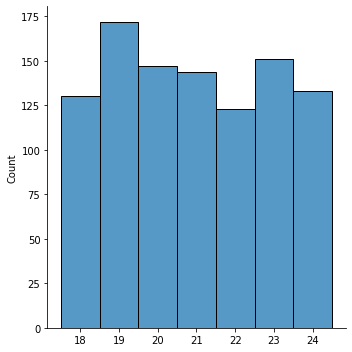

In [33]:
sns.displot(age, discrete=True)

In [34]:
# covert the age parameter into pandas series so we can easily investigate it 
age = pd.Series(age,name='Age')
age.describe()

count    1000.000000
mean       20.943000
std         1.982342
min        18.000000
25%        19.000000
50%        21.000000
75%        23.000000
max        24.000000
Name: Age, dtype: float64

In [27]:
df = pd.DataFrame()

In [29]:
df['Age'] = pd.Series(age)

In [30]:
df

,Age
0,22
1,19
2,18
3,19
4,22
...,...
995,21
996,22
997,18
998,24


### <u>Sex<u>

In [12]:
s = ['male', 'female']
sex = rng.choice(s, 1000, p=[0.5, 0.5])

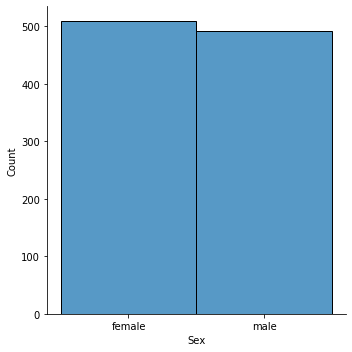

In [26]:
sns.displot(sex, discrete=True)

In [61]:
df['Sex'] = pd.Series(sex)
df['Sex'].describe()

count       1000
unique         2
top       female
freq         509
Name: Sex, dtype: object

In [62]:
# Need to covert sex to a categorical data type
# https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
df['Sex'] = pd.Series(sex, dtype="category")
df['Sex'].describe()

In [53]:
df

,Age,Sex,Height
0,22,female,170
1,19,male,175
2,18,male,182
3,19,female,175
4,22,male,183
...,...,...,...
995,21,male,183
996,22,female,169
997,18,male,179
998,24,female,158


In [54]:
df['Sex'].describe()

count       1000
unique         2
top       female
freq         509
Name: Sex, dtype: object

### <u>Height<u> 

Now that we have created an age and sex parameter we can use them to create a dataframe and append the remaining parameters as they are dependent on age and sex. 

The average male height in Ireland is 179 with a standard deviation of 7cm and 165cm for females with a standard deviation of 7.6cm

[][]
[] https://en.wikipedia.org/wiki/Average_human_height_by_country#Table_of_heights (height)

[] https://econ-papers.upf.edu/papers/1002.pdf (s.d of height)

In [55]:
# Lets create an empty parameter called height
df['Height'] = 0

In [56]:
for i in range(len(df)):
    if df["Sex"][i]=="male":
        df["Height"][i]=rng.normal(179,7)
    else:
        df["Height"][i]=rng.normal(165,7.6)

/Users/Shane/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/Shane/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
df['Height'].describe()

count    1000.000000
mean      171.244000
std        10.099429
min       142.000000
25%       164.000000
50%       171.000000
75%       179.000000
max       196.000000
Name: Height, dtype: float64

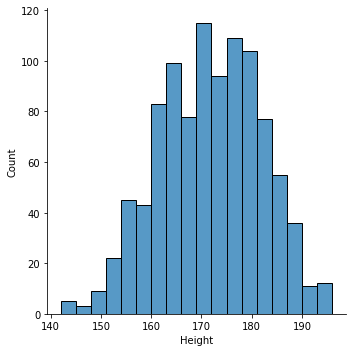

In [59]:
height = df['Height']
sns.displot(height)

In [63]:
df.describe()

,Age,Height
count,1000.000000,1000.000000
mean,21.020000,171.244000
std,1.983818,10.099429
min,18.000000,142.000000
25%,19.000000,164.000000
50%,21.000000,171.000000
75%,23.000000,179.000000
max,24.000000,196.000000


In [60]:
sns.displot(df, hue="Sex")

ValueError: The following variable cannot be assigned with wide-form data: `hue`

In [9]:
s = ['male', 'female']
sex = rng.choice(s, 1000, p=[0.5, 0.5]).reshape(1000,1)

In [10]:
# To create my dataframe I need to initialize a list containing my parameters  
#parameters = [age] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(age, columns = ['Age']) 
  
# print dataframe. 
df

,Age
0,21
1,24
2,23
3,21
4,18
...,...
995,20
996,21
997,24
998,24


In [11]:
df['Sex'] = rng.choice(s, 1000, p=[0.5, 0.5]).reshape(1000,1)

In [12]:
df

,Age,Sex
0,21,male
1,24,male
2,23,male
3,21,male
4,18,female
...,...,...
995,20,male
996,21,female
997,24,male
998,24,female


In [13]:
df['Height']= 0

In [14]:
for i in range(len(df)):
    if df["Sex"][i]=="male":
        df["Height"][i]=rng.normal(172,8)
    else:
        df["Height"][i]=rng.normal(172,8)

/Users/Shane/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Shane/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:
df

,Age,Sex,Height
0,21,male,171
1,24,male,176
2,23,male,180
3,21,male,168
4,18,female,181
...,...,...,...
995,20,male,149
996,21,female,166
997,24,male,174
998,24,female,161


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f966f8109d0>,
      dtype=object)

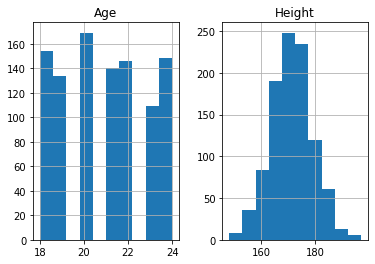

In [16]:
df.hist()

In [136]:
#df['Height']= height

In [137]:
#df['Weight']= rng.normal(72,20)

In [138]:
#df['BMI'] = df['Height']/df['Weight']

In [139]:
#df

In [140]:
df

,Age,Sex,Height,Weight,BMI
0,23,male,167,98.320804,1.769717
1,21,male,172,98.320804,1.668009
2,19,female,172,98.320804,1.678180
3,18,female,163,98.320804,1.779888
4,23,male,178,98.320804,1.901937
...,...,...,...,...,...
995,21,male,163,98.320804,1.759546
996,23,female,184,98.320804,1.810400
997,18,female,167,98.320804,1.698522
998,22,male,175,98.320804,1.769717


In [117]:
df["Height"]=0

for i in range(len(df)):
    if df["Sex"][i]=="male":
        df["Height"][i]=rng.normal(172,8,1000)
    else:
        df["Height"][i]=rng.normal(172,8,1000)

/Users/Shane/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/Shane/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


ValueError: setting an array element with a sequence.

## Height 

In [99]:
height = rng.normal(172,8,1000)

In [100]:
height


array([170.94094764, 172.82503948, 180.06256395, 167.31845082,
       182.20645889, 162.16632673, 181.26591979, 159.39672536,
       172.60455278, 170.47510946, 172.61976192, 188.79550945,
       166.94169394, 171.31311239, 173.14154358, 194.1739361 ,
       176.99279404, 176.77356374, 163.73137714, 177.06545015,
       178.55263848, 162.224228  , 167.29767904, 174.9957753 ,
       172.80298177, 170.27374595, 170.21472209, 166.8799748 ,
       157.25706835, 185.61508828, 176.8467315 , 169.49222082,
       184.36040961, 172.71569277, 164.3980473 , 170.95738932,
       170.91567448, 161.85925507, 163.27475584, 165.63644236,
       168.52576273, 177.62068277, 162.26784181, 177.01703231,
       183.56176548, 174.82995446, 157.1361904 , 164.08348385,
       178.74236261, 185.19806299, 184.61949791, 166.21378649,
       170.79755693, 173.28976648, 174.5803822 , 164.35579229,
       183.61218829, 166.11550232, 168.72490575, 182.94329482,
       157.45832033, 173.72526853, 181.0915123 , 167.86

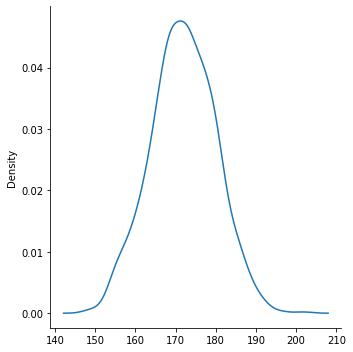

In [101]:
sns.displot(height, kind="kde")

In [106]:
df = pd.concat(df, height)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [105]:
df

,0
170.940948,23
172.825039,21
180.062564,19
167.318451,18
182.206459,23
...,...
168.721173,21
171.936289,23
179.764405,18
173.963784,22


## References

[1] https://mrmjournal.biomedcentral.com/articles/10.1186/s40248-016-0066-z#:~:text=Obesity%20causes%20mechanical%20compression%20of,and%20reduces%20respiratory%20muscle%20strength.

[2] https://en.wikipedia.org/wiki/Severe_acute_respiratory_syndrome_coronavirus_2

[3] https://www.pnas.org/content/117/36/22035

[4] https://www.nature.com/articles/s41598-020-73777-8

https://hselibrary.ie/what-is-the-risk-of-a-person-with-obesity-contracting-covid-19-compared-to-someone-without-obesity-what-is-the-risk-of-a-person-with-obesity-developing-severe-illness-from-covid-19-how-is-severe-ill/

https://onlinelibrary.wiley.com/doi/full/10.1002/oby.22818?campaign=wolacceptedarticle&fbclid=IwAR1HR33IgvVlKadWx0pohO1A64g21vKRq8SFLRNvnoFhR5UsQQiIYNyyaTQ

https://www.hopkinsmedicine.org/health/conditions-and-diseases/coronavirus

Other Reference:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

[] https://en.wikipedia.org/wiki/Average_human_height_by_country#Table_of_heights (height)

[] https://econ-papers.upf.edu/papers/1002.pdf (s.d of height)

### Issue

- I tried first to pass np.arrays into the df directly. Found it is best to create pd.series first
- Trouble converting Sex in a categorical varialbe which I could assign to hue in seaborn